In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score # Added regression metrics
from sklearn.model_selection import train_test_split # Added for splitting data

In [29]:
# Load the dataset
data = pd.read_csv('/content/final_food_insecurity_dataset.csv')

# Display the first few rows and information about the dataset
print("First 5 rows of the dataset:")
display(data.head())

print("\nInformation about the dataset:")
data.info()

print("\nDescriptive statistics of the dataset:")
display(data.describe())

First 5 rows of the dataset:


,Country,ISO_Code,Date,People_in_Phase_3_plus,Unit,Indicator
0,Afghanistan,AFG,2017-05,762742.0,Persons,People in Phase 3 food insecurity or above
1,Afghanistan,AFG,2017-05,26.0,Percentage,People in Phase 3 food insecurity or above
2,Afghanistan,AFG,2017-09,7605812.0,Persons,People in Phase 3 food insecurity or above
3,Afghanistan,AFG,2017-09,27.0,Percentage,People in Phase 3 food insecurity or above
4,Afghanistan,AFG,2018-01,1302047.0,Persons,People in Phase 3 food insecurity or above



Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 878 non-null    object 
 1   ISO_Code                878 non-null    object 
 2   Date                    878 non-null    object 
 3   People_in_Phase_3_plus  878 non-null    float64
 4   Unit                    878 non-null    object 
 5   Indicator               878 non-null    object 
dtypes: float64(1), object(5)
memory usage: 41.3+ KB

Descriptive statistics of the dataset:


,People_in_Phase_3_plus
count,8.780000e+02
mean,1.688840e+06
std,4.125627e+06
min,1.000000e+00
25%,1.500000e+01
50%,1.832550e+04
75%,1.408581e+06
max,2.755127e+07


In [30]:
# Define target variable (y) and features (X)
target_variable = 'People_in_Phase_3_plus'
y = data[target_variable]
X = data.drop(columns=[target_variable, 'Unit', 'Indicator'])

# Convert 'Date' column to datetime objects
X['Date'] = pd.to_datetime(X['Date'])

# Extract numerical features from 'Date'
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
# Drop the original 'Date' column
X = X.drop(columns=['Date'])

# One-hot encode 'Country' and 'ISO_Code'
X = pd.get_dummies(X, columns=['Country', 'ISO_Code'], drop_first=True)

print(f"Target variable: {target_variable}")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print("Features after preprocessing (first model path):")
display(X.head())

Target variable: People_in_Phase_3_plus
Features shape: (878, 104)
Target shape: (878,)
Features after preprocessing (first model path):


,Year,Month,Country_Angola,Country_Bangladesh,Country_Benin,Country_Burkina Faso,Country_Burundi,Country_Cabo Verde,Country_Cameroon,Country_Central African Republic,...,ISO_Code_SWZ,ISO_Code_TCD,ISO_Code_TGO,ISO_Code_TLS,ISO_Code_TZA,ISO_Code_UGA,ISO_Code_YEM,ISO_Code_ZAF,ISO_Code_ZMB,ISO_Code_ZWE
0,2017,5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2017,5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2017,9,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2017,9,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2018,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (702, 104)
X_test shape: (176, 104)
y_train shape: (702,)
y_test shape: (176,)


In [32]:
# Initialize the XGBoost Regressor model
# Using default parameters for now, can be tuned later
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

print("XGBoost Regressor model trained successfully!")

XGBoost Regressor model trained successfully!


In [33]:
pass # This cell's functionality has been moved to cell f062b746 for better flow.

In [34]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance on Test Set:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Model Performance on Test Set:
Mean Squared Error (MSE): 27259636929063.05
R-squared (R2): -3.26


In [35]:
# Filter the data to include only 'Persons' for the target variable
data_persons = data[data['Unit'] == 'Persons'].copy()

print(f"Shape of data_persons: {data_persons.shape}")
print("First 5 rows of data_persons (Unit = Persons):")
display(data_persons.head())

Shape of data_persons: (440, 6)
First 5 rows of data_persons (Unit = Persons):


,Country,ISO_Code,Date,People_in_Phase_3_plus,Unit,Indicator
0,Afghanistan,AFG,2017-05,762742.0,Persons,People in Phase 3 food insecurity or above
2,Afghanistan,AFG,2017-09,7605812.0,Persons,People in Phase 3 food insecurity or above
4,Afghanistan,AFG,2018-01,1302047.0,Persons,People in Phase 3 food insecurity or above
6,Afghanistan,AFG,2018-09,9838407.0,Persons,People in Phase 3 food insecurity or above
8,Afghanistan,AFG,2019-09,10232241.0,Persons,People in Phase 3 food insecurity or above


In [36]:
# Define target variable (y) and features (X) for the filtered data
target_variable_filtered = 'People_in_Phase_3_plus'
y_filtered = data_persons[target_variable_filtered]
X_filtered = data_persons.drop(columns=[target_variable_filtered, 'Unit', 'Indicator'])

# Convert 'Date' column to datetime objects
X_filtered['Date'] = pd.to_datetime(X_filtered['Date'])

# Extract numerical features from 'Date'
X_filtered['Year'] = X_filtered['Date'].dt.year
X_filtered['Month'] = X_filtered['Date'].dt.month
# Drop the original 'Date' column
X_filtered = X_filtered.drop(columns=['Date'])

# One-hot encode 'Country' and 'ISO_Code'
X_filtered = pd.get_dummies(X_filtered, columns=['Country', 'ISO_Code'], drop_first=True)

print(f"Target variable for filtered data: {target_variable_filtered}")
print(f"Features shape for filtered data: {X_filtered.shape}")
print(f"Target shape for filtered data: {y_filtered.shape}")
print("Features after preprocessing (filtered data):")
display(X_filtered.head())

Target variable for filtered data: People_in_Phase_3_plus
Features shape for filtered data: (440, 104)
Target shape for filtered data: (440,)
Features after preprocessing (filtered data):


,Year,Month,Country_Angola,Country_Bangladesh,Country_Benin,Country_Burkina Faso,Country_Burundi,Country_Cabo Verde,Country_Cameroon,Country_Central African Republic,...,ISO_Code_SWZ,ISO_Code_TCD,ISO_Code_TGO,ISO_Code_TLS,ISO_Code_TZA,ISO_Code_UGA,ISO_Code_YEM,ISO_Code_ZAF,ISO_Code_ZMB,ISO_Code_ZWE
0,2017,5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2017,9,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2018,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,2018,9,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,2019,9,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
# Split the filtered data into training and testing sets
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

print(f"X_train_filtered shape: {X_train_filtered.shape}")
print(f"X_test_filtered shape: {X_test_filtered.shape}")
print(f"y_train_filtered shape: {y_train_filtered.shape}")
print(f"y_test_filtered shape: {y_test_filtered.shape}")

X_train_filtered shape: (352, 104)
X_test_filtered shape: (88, 104)
y_train_filtered shape: (352,)
y_test_filtered shape: (88,)


In [38]:
# Initialize and train a new XGBoost Regressor model on filtered data
model_filtered = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model_filtered.fit(X_train_filtered, y_train_filtered)

print("XGBoost Regressor model trained successfully on filtered data!")

XGBoost Regressor model trained successfully on filtered data!


In [39]:
# Make predictions and evaluate the new model
y_pred_filtered = model_filtered.predict(X_test_filtered)

mse_filtered = mean_squared_error(y_test_filtered, y_pred_filtered)
r2_filtered = r2_score(y_test_filtered, y_pred_filtered)

print(f"\nModel Performance on Filtered Test Set (Unit = Persons):")
print(f"Mean Squared Error (MSE): {mse_filtered:.2f}")
print(f"R-squared (R2): {r2_filtered:.2f}")


Model Performance on Filtered Test Set (Unit = Persons):
Mean Squared Error (MSE): 10545654100976.92
R-squared (R2): 0.29


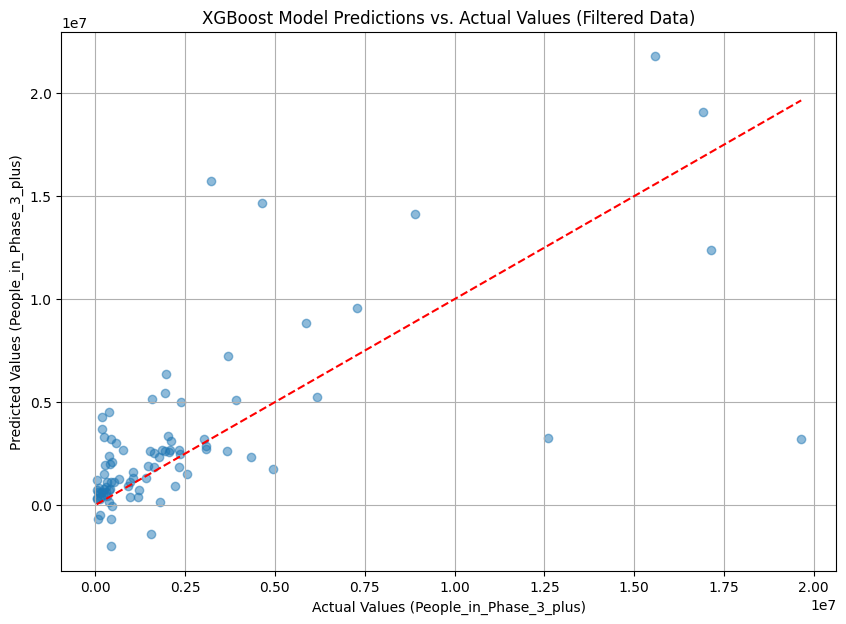

In [40]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test_filtered, y_pred_filtered, alpha=0.5)
plt.plot([y_test_filtered.min(), y_test_filtered.max()], [y_test_filtered.min(), y_test_filtered.max()], 'r--')
plt.xlabel('Actual Values (People_in_Phase_3_plus)')
plt.ylabel('Predicted Values (People_in_Phase_3_plus)')
plt.title('XGBoost Model Predictions vs. Actual Values (Filtered Data)')
plt.grid(True)
plt.show()